# Train Final Model

Work that has been done (session 4, session 5, session 7)
* Data has been collected, checked for cleanliness, saved as a .csv gestures x 100 time points (with associated metadata)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import random

In [3]:
random_seed = 42
random.seed(random_seed)
FIG_SIZE = (10, 7)

## Load Session 4

In [4]:
s4_meta = pd.read_csv("../session_4/meta_gestures.csv")
s4_meta

,index,date,subject,replicate,noise-level,intent,body orientation,ring,hand,hand rest (stability),...,firebase,time,X_trial,X_num_taps,X_detected_starts,X_extra_starts_in_front,X_extra_starts_in_end,sanity check,trial,gesture_num
0,0,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,6
1,1,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,4
2,2,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,2
3,3,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,6
4,4,April 2,Gati,1,clean,isolated (wrist),sitting in chair,"2-finger, pointer-index",right,no,...,F0442A72-0E6E-4790-AB16-00940C3D37A7.json,1:39:00 PM,0,78 (missed the first one?),42,2,0,40,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,9
596,596,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,4
597,597,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,2
598,598,April 2,Gati,1,clean,"large, maybe more comfortable (elbow)",sitting in chair,"2-finger, pointer-index",right,"implicitly, for comfort",...,3555E195-07D5-4DBD-AC5B-68C536BB25FE.json,2:49:00 PM,14,79,42,2,0,40,14,6


In [5]:
s4_data = np.genfromtxt("../session_4/data_gestures.csv")
s4_data.shape

(600, 700)

In [6]:
s4_meta.columns

Index(['index', 'date', 'subject', 'replicate', 'noise-level', 'intent',
       'body orientation', 'ring', 'hand', 'hand rest (stability)',
       'hand orientation', 'gestures', 'firebase', 'time', 'X_trial',
       'X_num_taps', 'X_detected_starts', 'X_extra_starts_in_front',
       'X_extra_starts_in_end', 'sanity check', 'trial', 'gesture_num'],
      dtype='object')

In [7]:
s4_meta["hand orientation"] # kept all the trials

0        90 deg (in air, face-level)
1        90 deg (in air, face-level)
2        90 deg (in air, face-level)
3        90 deg (in air, face-level)
4        90 deg (in air, face-level)
                   ...              
595    -45 deg (in air, chair-level)
596    -45 deg (in air, chair-level)
597    -45 deg (in air, chair-level)
598    -45 deg (in air, chair-level)
599    -45 deg (in air, chair-level)
Name: hand orientation, Length: 600, dtype: object

In [47]:
s4_meta["subject"].unique()

array(['Gati'], dtype=object)

## Load Session 5

In [8]:
s5_meta = pd.read_csv("../session_5/meta_gestures.csv")
s5_meta

,index,Username,Intent,Replicate,Keep,trial,firebase,gestures,gesture_num
0,0,Eamon,A,1,keep,0,EamonA1,d,4
1,1,Eamon,A,1,keep,0,EamonA1,d,4
2,2,Eamon,A,1,keep,0,EamonA1,i,9
3,3,Eamon,A,1,keep,0,EamonA1,i,9
4,4,Eamon,A,1,keep,0,EamonA1,b,2
...,...,...,...,...,...,...,...,...,...
415,415,SeungU,B,1,keep,34,SeungUB1,d,4
416,416,SeungU,B,1,keep,34,SeungUB1,d,4
417,417,SeungU,B,1,keep,34,SeungUB1,i,9
418,418,SeungU,B,1,keep,34,SeungUB1,b,2


In [9]:
trial_offset = 15 # add this to all the trials (keep trials unique between sessions)
s5_meta["trial"] = s5_meta.apply(lambda x: x["trial"] + trial_offset, axis = 1)

In [10]:
s5_data = np.genfromtxt("../session_5/data_gestures.csv")
s5_data.shape

(420, 700)

In [44]:
s5_meta["Username"].unique() # 16 subjects

array(['Eamon', 'Myles', 'Charlie', 'Alessandra', 'Ben', 'Prisha',
       'Rishita', 'AlexRE', 'Gati', 'LukeRE', 'SamK', 'Hk', 'Adi',
       'Declan', 'Alana', 'SeungU'], dtype=object)

## Load Session 7

In [12]:
s7_meta = pd.read_csv("../session_7/meta_gestures.csv")
s7_meta

,index,Username,Intent,trial,firebase,gestures,gesture_num
0,0,achang,A,0,achangA,B,2
1,1,achang,A,0,achangA,B,2
2,2,achang,A,0,achangA,C,3
3,3,achang,A,0,achangA,A,1
4,4,achang,A,0,achangA,A,1
...,...,...,...,...,...,...,...
187,187,Solomiia,B,15,SolomiiaB,D,4
188,188,Solomiia,B,15,SolomiiaB,A,1
189,189,Solomiia,B,15,SolomiiaB,A,1
190,190,Solomiia,B,15,SolomiiaB,C,3


In [13]:
trial_offset = 35 # add this to all the trials (keep trials unique between sessions)
s7_meta["trial"] = s7_meta.apply(lambda x: x["trial"] + trial_offset, axis = 1)

In [14]:
s7_data = np.genfromtxt("../session_7/data_gestures.csv")
s7_data.shape

(192, 700)

In [49]:
s7_meta["Username"].unique() # 10 users

array(['achang', 'Andrew', 'kguerra', 'Amyah', 'Nyah', 'pogunbufunmi',
       'dgarcia', 'Wfan', 'Ale', 'Echen1', 'Solomiia'], dtype=object)

## Format Meta Data To Be Consistent & Stack Data

In [15]:
s4_meta_data = s4_meta[["trial", "gesture_num"]]
s4_meta_data

,trial,gesture_num
0,0,6
1,0,4
2,0,2
3,0,6
4,0,4
...,...,...
595,14,9
596,14,4
597,14,2
598,14,6


In [16]:
s5_meta_data = s5_meta[["trial", "gesture_num"]]
s5_meta_data

,trial,gesture_num
0,15,4
1,15,4
2,15,9
3,15,9
4,15,2
...,...,...
415,49,4
416,49,4
417,49,9
418,49,2


In [17]:
s7_meta_data = s7_meta[["trial", "gesture_num"]]
s7_meta_data

,trial,gesture_num
0,35,2
1,35,2
2,35,3
3,35,1
4,35,1
...,...,...
187,50,4
188,50,1
189,50,1
190,50,3


**remap session 4 and 5 to have same gesture mapping as session 7**

session 7 had comparably more refined and restricted gesture movements

In [18]:
def remap(row):
    gesture_num = row["old_gesture_num"]
    if gesture_num == 9: # flick
        return 1
    if gesture_num == 4: # downward tap
        return 2
    if gesture_num == 6: # counter clockwise circle
        return 3
    if gesture_num == 2: # swipe right
        return 4
    else:
        return gesture_num
    
s4_meta_data["old_gesture_num"] = s4_meta_data["gesture_num"]
s5_meta_data["old_gesture_num"] = s5_meta_data["gesture_num"]

s4_meta_data["gesture_num"] = s4_meta_data.apply(remap, axis = 1)
s5_meta_data["gesture_num"] = s5_meta_data.apply(remap, axis = 1)

s4_meta_data = s4_meta_data[["trial", "gesture_num"]]
s5_meta_data = s5_meta_data[["trial", "gesture_num"]]

<ipython-input-18-bf312c6fb982>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s4_meta_data["old_gesture_num"] = s4_meta_data["gesture_num"]
<ipython-input-18-bf312c6fb982>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s5_meta_data["old_gesture_num"] = s5_meta_data["gesture_num"]
<ipython-input-18-bf312c6fb982>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [19]:
s4_meta_data

,trial,gesture_num
0,0,3
1,0,2
2,0,4
3,0,3
4,0,2
...,...,...
595,14,1
596,14,2
597,14,4
598,14,3


In [20]:
s5_meta_data

,trial,gesture_num
0,15,2
1,15,2
2,15,1
3,15,1
4,15,4
...,...,...
415,49,2
416,49,2
417,49,1
418,49,4


In [21]:
# meta_data = pd.concat([s4_meta_data, s5_meta_data])
meta_data = pd.concat([s4_meta_data, s5_meta_data, s7_meta_data])
meta_data["index"] = range(len(meta_data))
meta_data = meta_data.set_index("index")
meta_data

# data = np.vstack((s4_data, s5_data))
data = np.vstack((s4_data, s5_data, s7_data))
data.shape

(1212, 700)

In [22]:
# # on s5 only
# meta_data = s5_meta_data
# meta_data["index"] = range(len(meta_data))
# meta_data = meta_data.set_index("index")
# meta_data
# data = s5_data

In [23]:
y_gn = list(meta_data["gesture_num"])
len(y_gn)

1212

## Train-Test Split
* test: 243 gestures (randomly chosen) (s4, s5: 816)
* train: 969 trials (s4, s5: 204)

*ignore trial*

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, y_gn, test_size=0.20, random_state=random_seed)

In [25]:
X_train.shape

(969, 700)

In [26]:
X_test.shape

(243, 700)

In [27]:
len(X_train)

969

In [28]:
len(y_test)

243

In [29]:
# save test data
with open("meta_gestures_test.csv", 'w') as f:
    for item in y_test:
        f.write("%s\n" % item)
np.savetxt("data_gestures_test.csv", X_test)

In [30]:
def plot_trace(t_data, t_labels, choose_gesture = 1, choose_channel = 2):
    gestures = t_data[[y == choose_gesture for y in t_labels]]
    print(gestures.shape)

    fig = plt.figure()
    ax = plt.axes()
    s = choose_channel * 100
    e = s + 100
    for i in range(gestures.shape[0]):
        ax.plot(range(0, 100), gestures[i][s:e])

In [31]:
def plot_single_trace(t_data):
    fig, (ax1, ax2, ax3, ax7) = plt.subplots(4, sharex=True, sharey=True)
    ax1.plot(range(100), t_data[0:100])
    ax1.set_title("acc. x-axis")
    
    ax2.plot(range(100), t_data[100:200])
    ax2.set_title("acc. y-axis")
    
    ax3.plot(range(100), t_data[200:300])
    ax3.set_title("acc. z-axis")
    
    ax7.plot(range(100), t_data[600:])
    ax7.set_title("orientation (quaternian)")
    
    ax7.set_xlabel("time (100 ms window)")
    fig.tight_layout()

2
2
2
3


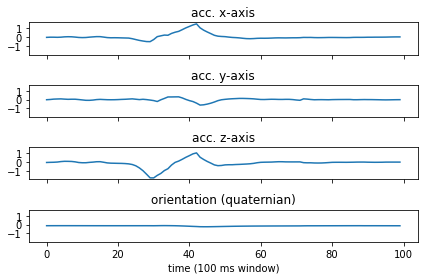

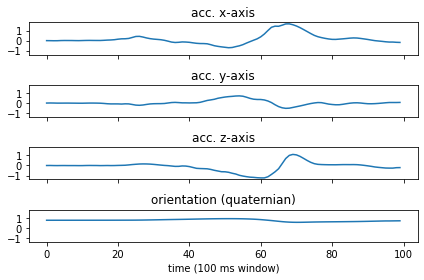

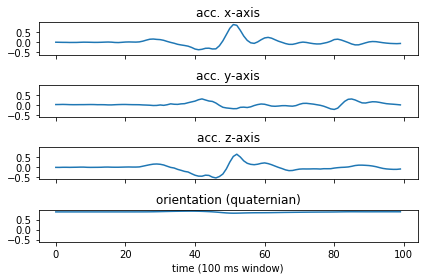

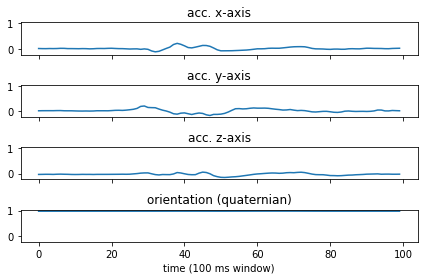

In [32]:
plot_single_trace(X_train[0])
print(y_train[0])
plot_single_trace(X_train[1])
print(y_train[1])
plot_single_trace(X_train[2])
print(y_train[2])
plot_single_trace(X_train[3])
print(y_train[3])

(248, 700)
(248, 700)
(248, 700)


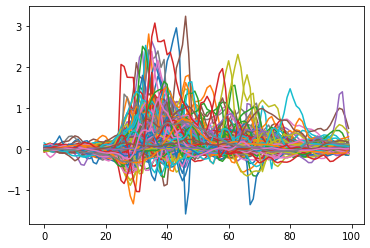

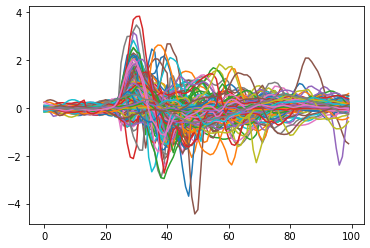

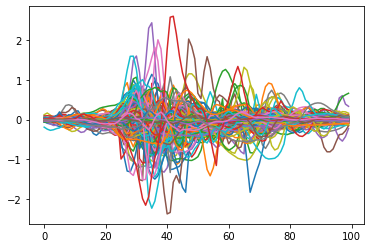

In [33]:
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 0)
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 1)
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 2)

(243, 700)
(244, 700)
(234, 700)
(248, 700)


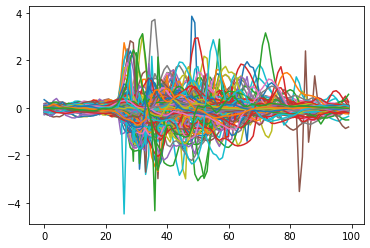

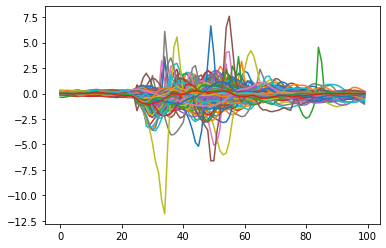

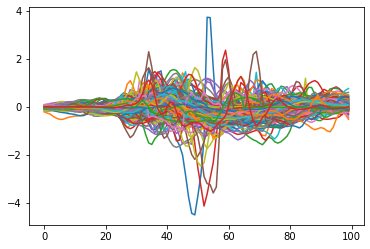

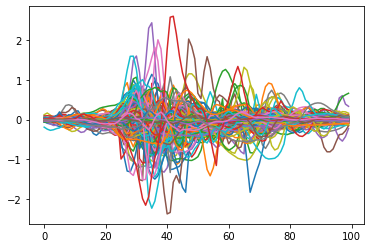

In [34]:
# train data for gesture
# plot_trace(X_train, y_train, choose_gesture = 6, choose_channel = 2)
# plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 2)
# plot_trace(X_train, y_train, choose_gesture = 2, choose_channel = 2)
# plot_trace(X_train, y_train, choose_gesture = 9, choose_channel = 2)

plot_trace(X_train, y_train, choose_gesture = 1, choose_channel = 2)
plot_trace(X_train, y_train, choose_gesture = 2, choose_channel = 2)
plot_trace(X_train, y_train, choose_gesture = 3, choose_channel = 2)
plot_trace(X_train, y_train, choose_gesture = 4, choose_channel = 2)

## Run Pipeline

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import joblib

In [36]:
def run_pipeline(x_train, x_test, y_train, y_test, n_comp=0, 
                 show_confusion=True, show_pca_gesture=True,
                 save_as=""):
    # Fit to data and predict gesture
    if n_comp == 0:
        n_pc = min(x_train.shape[0], x_train.shape[1])
    else:
        n_pc = n_comp
    clf = make_pipeline(StandardScaler(), PCA(n_components=n_pc), SVC())
    clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    acc = accuracy_score(y_test, pred_test)
    
    if (save_as != ""):
        joblib.dump(clf, save_as)
        print(f"Saved model to {save_as}")
    
    if (show_confusion):
        # print accuracy
        print("Prediction accuracy for test dataset")
        print(f"{acc:.2%}")

        # visualize confusion matrirx
        cm = confusion_matrix(y_test, pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.show()

    if (show_pca_gesture):
        # visualize pca
        scaler = clf.named_steps["standardscaler"]
        x_train_proj = scaler.transform(x_train)
        pca = clf.named_steps["pca"]
        x_train_proj = pca.transform(x_train_proj)
        
        # plot train gesture
        fig, ax = plt.subplots(figsize=FIG_SIZE)
        scatter = ax.scatter(
                x=x_train_proj[:, 0],
                y=x_train_proj[:, 1],
                c=y_train,
                cmap="tab20",
            )
        # produce a legend with the unique colors from the scatter
        legend = ax.legend(*scatter.legend_elements(prop="colors"),
                            loc="lower left", title="Gestures")
        ax.add_artist(legend)
        
    return acc

Saved model to pca_svm_train_model_session_4_and_5_and_7.pkl
Prediction accuracy for test dataset
76.13%


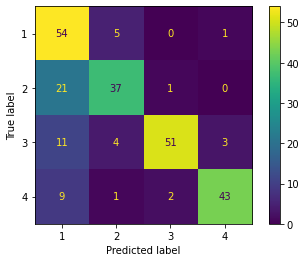

0.7613168724279835

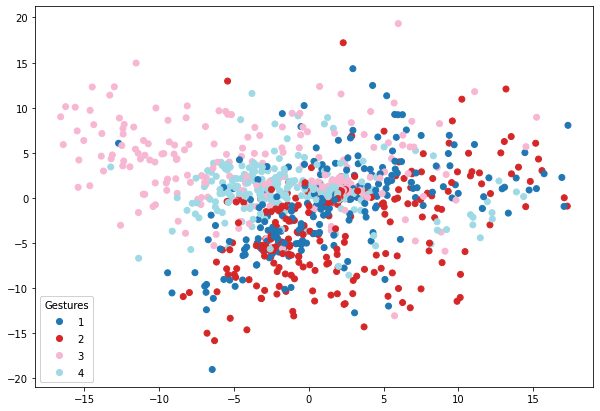

In [37]:
run_pipeline(X_train[:, 0:300], X_test[:, 0:300], 
             y_train, y_test, save_as="pca_svm_train_model_session_4_and_5_and_7.pkl")

In [38]:
# # reshape data to be gestures x ?
# # accuracy --> 0.7549019607843137%
# run_pipeline(X_train[:, 0:300], X_test[:, 0:300], 
#              y_train, y_test, save_as="pca_svm_train_model_session_4_and_5.pkl")

## Test Loading and Predicting

In [39]:
clf = joblib.load("pca_svm_train_model_session_4_and_5_and_7.pkl")
pred_test = clf.predict(X_test[:, 0:300])
acc = accuracy_score(y_test, pred_test)
acc

0.7613168724279835

# Save Full Model

In [40]:
def save_full_model(x, y, n_comp=0, 
                 show_pca_gesture=True,
                 save_as=""):
    # Fit to data and predict gesture
    if n_comp == 0:
        n_pc = min(x.shape[0], x.shape[1])
    else:
        n_pc = n_comp
    
    clf = make_pipeline(StandardScaler(), PCA(n_components=n_pc), SVC())
    clf.fit(x, y)
    
    if (save_as != ""):
        joblib.dump(clf, save_as)
        print(f"Saved model to {save_as}")

    if (show_pca_gesture):
        # visualize pca
        scaler = clf.named_steps["standardscaler"]
        x_proj = scaler.transform(x)
        pca = clf.named_steps["pca"]
        x_proj = pca.transform(x_proj)
        
        # plot train gesture
        fig, ax = plt.subplots(figsize=FIG_SIZE)
        scatter = ax.scatter(
                x=x_proj[:, 0],
                y=x_proj[:, 1],
                c=y,
                cmap="tab20",
            )
        # produce a legend with the unique colors from the scatter
        legend = ax.legend(*scatter.legend_elements(prop="colors"),
                            loc="lower left", title="Gestures")
        ax.add_artist(legend)

In [41]:
data.shape

(1212, 700)

In [42]:
len(y_gn)

1212

Saved model to pca_svm_full_model_session_4_and_5_and_7.pkl


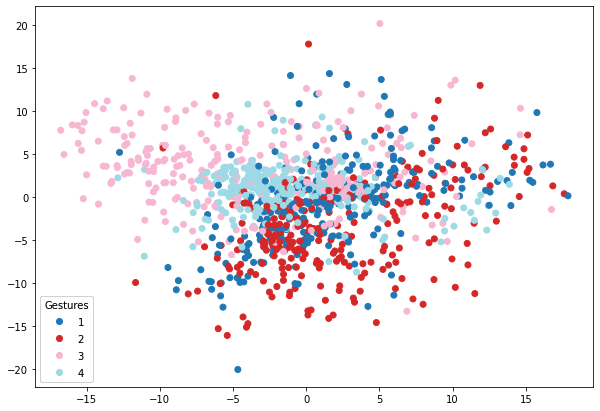

In [43]:
save_full_model(data[:, 0:300], y_gn, save_as="pca_svm_full_model_session_4_and_5_and_7.pkl")